# Storytelling about Stroke

Stroke is a disease that affects the arteries leading to and within the brain. It is the No. 5 cause of death and a leading cause of disability in the United States.

A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

## Question

What factors are associated with a higher risk of stroke based on the dataset?

## DataSet Information

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



## Import Libraries and Load Data

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [215]:
stroke_df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

## Data Overview

In [216]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [217]:
stroke_df.shape

(5110, 12)

In [218]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [219]:
stroke_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [220]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [221]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)

In [222]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [223]:
stroke_df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [224]:
category=["gender","hypertension","heart_disease","ever_married","work_type","residence_type","smoking_status","stroke"]

for i in category[:-1]:
    try:
        print(f"{i} vs stroke")
        print(stroke_df[[i,'stroke']].groupby([i],as_index=False).mean().sort_values(by='stroke',ascending=False))
        print("--------------")
    except KeyError as e:
        print(f"KeyError: {e}. Please check if '{i}' and 'stroke' are valid column names in your dataset.")

gender vs stroke
   gender    stroke
1    Male  0.051064
0  Female  0.047094
2   Other  0.000000
--------------
hypertension vs stroke
   hypertension    stroke
1             1  0.132530
0             0  0.039679
--------------
heart_disease vs stroke
   heart_disease    stroke
1              1  0.170290
0              0  0.041787
--------------
ever_married vs stroke
  ever_married    stroke
1          Yes  0.065613
0           No  0.016505
--------------
work_type vs stroke
       work_type    stroke
3  Self-employed  0.079365
2        Private  0.050940
0       Govt_job  0.050228
4       children  0.002911
1   Never_worked  0.000000
--------------
residence_type vs stroke
KeyError: "['residence_type'] not in index". Please check if 'residence_type' and 'stroke' are valid column names in your dataset.
smoking_status vs stroke
    smoking_status    stroke
1  formerly smoked  0.079096
3           smokes  0.053232
2     never smoked  0.047569
0          Unknown  0.030440
--------------


## Exploratory Data Analysis (EDA)

Distribution of Stroke Cases

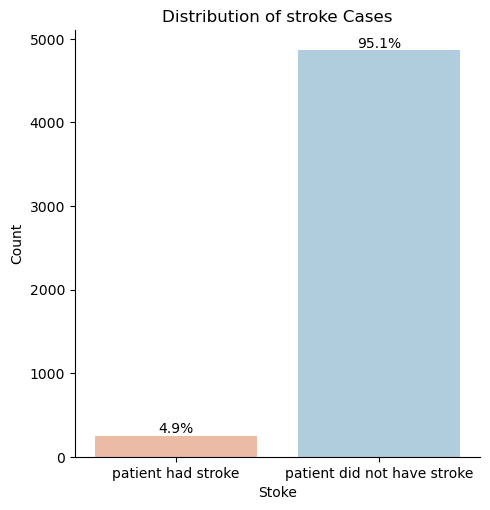

In [225]:
%%capture --no-stdout --no-display
stroke_df ['stroke'] = stroke_df ['stroke'].map({0:"patient did not have stroke",1:"patient had stroke"})
plot = sns.catplot(x='stroke',data= stroke_df,kind='count',palette='RdBu')
total=len(stroke_df['stroke'])
for p in plot.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.ax.text(x,y, percentage, ha='center',va='bottom')
plt.xlabel('Stoke')
plt.ylabel('Count')
plt.title('Distribution of stroke Cases')
plt.show()

Age Distribution

/var/folders/5h/dy__qw5j7051hg5zhx8csv_w0000gn/T/ipykernel_34001/2261009171.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(stroke_df['age'],bins=25,kde=True, palette='RdBu')


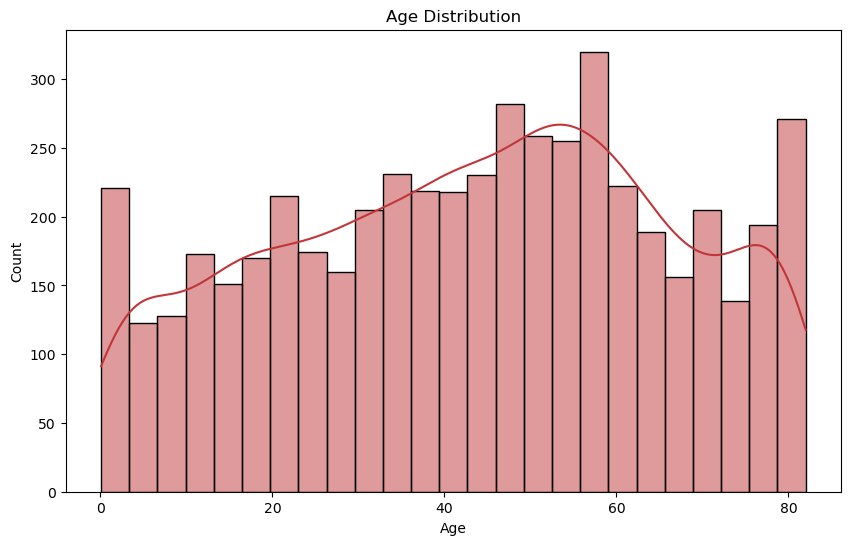

In [121]:
plt.figure(figsize=(10,6))
sns.histplot(stroke_df['age'],bins=25,kde=True, palette='RdBu')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [148]:
average_age_stroke = stroke_df[stroke_df['stroke'] == 'patient had stroke']['age'].mean()
average_age_no_stroke = stroke_df[stroke_df['stroke'] == 'patient did not have stroke']['age'].mean()

print(f"Average Age for Stroke: {average_age_stroke:.2f} years old")
print(f"Average Age for No Stroke: {average_age_no_stroke:.2f} years old")

Average Age for Stroke: 67.73 years old
Average Age for No Stroke: 41.97 years old


Stroke Cases by Gender

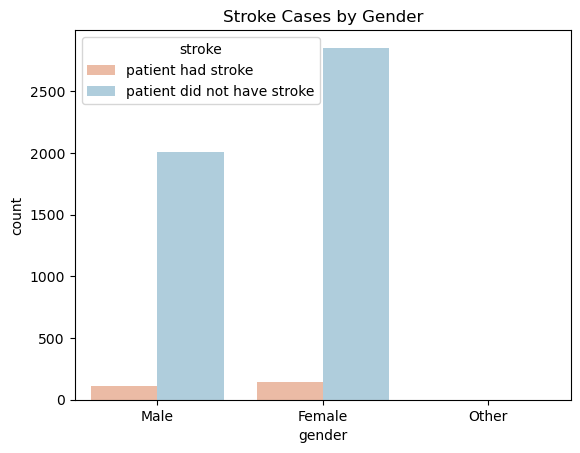

In [122]:
sns.countplot(x='gender', hue='stroke', data=stroke_df, palette='RdBu')
plt.title('Stroke Cases by Gender')
plt.show()

Hypertension and Heart Disease

In [144]:
counts_hypertension = stroke_df.groupby(['hypertension', 'stroke']).size().unstack().fillna(0)
percentage_hypertension = counts_hypertension['Percentage_stroke'] = (counts_hypertension['patient had stroke'] / (counts_hypertension['patient had stroke'] + counts_hypertension['patient did not have stroke'])) * 100

counts_heart_disease = stroke_df.groupby(['heart_disease', 'stroke']).size().unstack().fillna(0)
percentage_heart_disease = counts_hypertension['Percentage_stroke'] = (counts_heart_disease['patient had stroke'] / (counts['patient had stroke'] + counts['patient did not have stroke'])) * 100

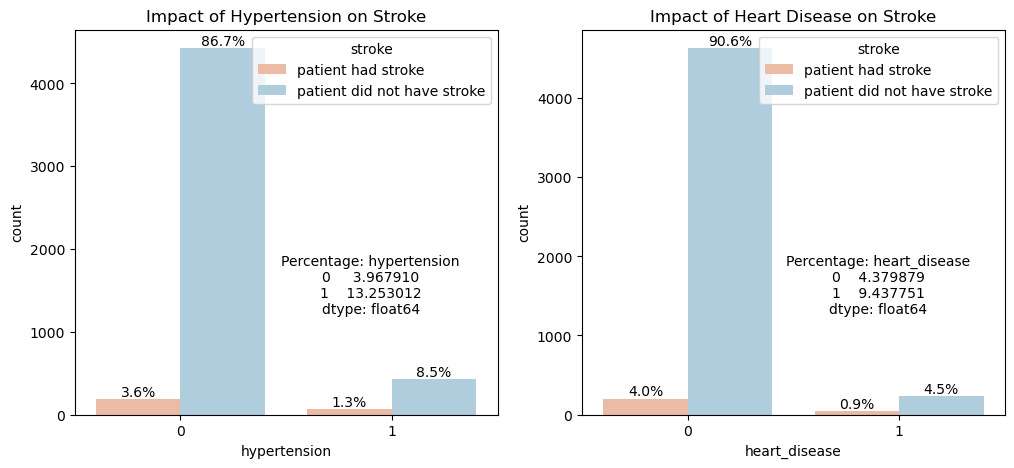

In [124]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

ax1 = sns.countplot(x='hypertension',hue='stroke', data=stroke_df, ax=axes[0], palette='RdBu')
axes[0].set_title('Impact of Hypertension on Stroke')

total = len(stroke_df['hypertension'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.text(x, y, percentage, ha='center', va='bottom')


ax2=sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, ax=axes[1], palette='RdBu')
axes[1].set_title('Impact of Heart Disease on Stroke')
total = len(stroke_df['heart_disease'])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.text(x, y, percentage, ha='center', va='bottom')

ax1.annotate(f'Percentage: {percentage_hypertension}', xy=(0.7, 0.3), xytext=(0,10), xycoords='axes fraction', textcoords='offset points', ha='center', va='center')    
ax2.annotate(f'Percentage: {percentage_heart_disease}', xy=(0.7, 0.3), xytext=(0, 10), xycoords='axes fraction', textcoords='offset points', ha='center', va='center')

plt.show()

Average Glucose Level and BMI

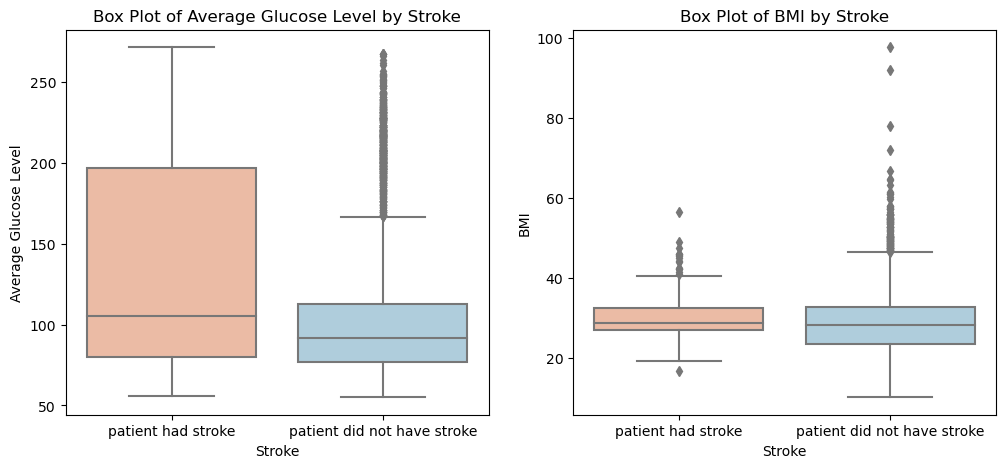

In [125]:
sns.set_palette('RdBu')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=stroke_df['stroke'],y=stroke_df['avg_glucose_level'],ax=axes[0],palette='RdBu')
axes[0].set_title('Box Plot of Average Glucose Level by Stroke')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Average Glucose Level')

sns.boxplot(x=stroke_df['stroke'],y=stroke_df['bmi'],ax=axes[1],palette='RdBu')
axes[1].set_title('Box Plot of BMI by Stroke')
axes[1].set_xlabel('Stroke')
axes[1].set_ylabel('BMI')
plt.show()

Work Type and Residence Type

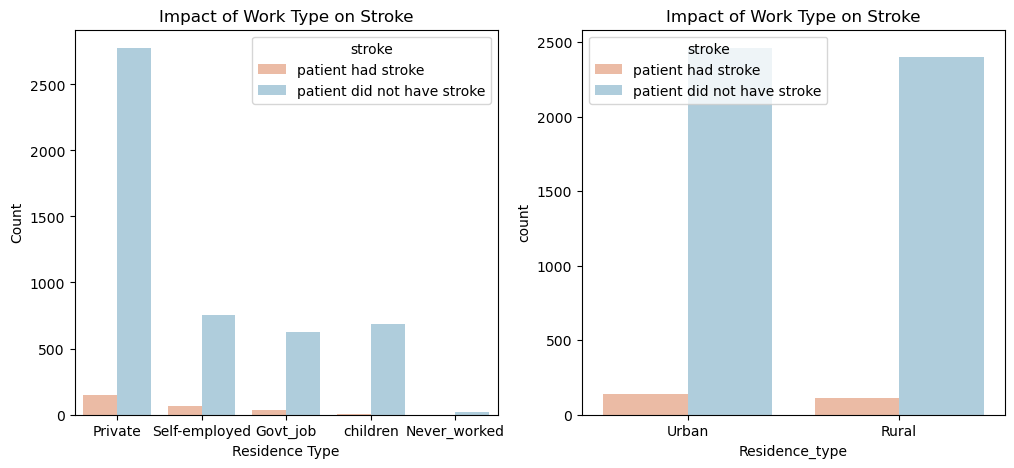

In [126]:
sns.set_palette('RdBu')
fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='work_type', hue='stroke', data=stroke_df, ax=axes[0],palette='RdBu')
axes[0].set_title('Impact of Work Type on Stroke')
axes[0].set_xlabel('Work Type')
axes[0].set_ylabel('Count')

sns.countplot(x='Residence_type', hue='stroke', data=stroke_df, ax=axes[1],palette='RdBu')
axes[1].set_title('Impact of Work Type on Stroke')
axes[0].set_xlabel('Residence Type')
axes[0].set_ylabel('Count')
plt.show()

Smoking Status

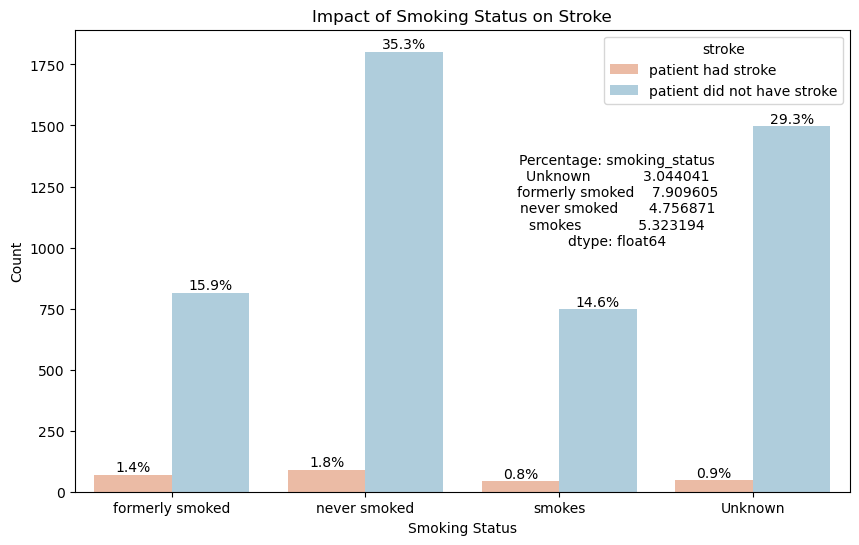

In [142]:
sns.set_palette('RdBu')

plt.figure(figsize=(10,6))
ax1 = sns.countplot(x='smoking_status',hue='stroke',data=stroke_df,palette='RdBu')

total = len(stroke_df['smoking_status'])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.text(x, y, percentage, ha='center', va='bottom')
    
plt.title('Impact of Smoking Status on Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
ax1.annotate(f'Percentage: {percentage_stroke}', xy=(0.7, 0.6), xytext=(0,10), xycoords='axes fraction', textcoords='offset points', ha='center', va='center')    
plt.show()

In [143]:
counts_smoking = stroke_df.groupby(['smoking_status', 'stroke']).size().unstack().fillna(0)
percentage_stroke=counts_smoking['Percentage_stroke'] = (counts_smoking['patient had stroke'] / (counts_smoking['patient had stroke'] + counts_smoking['patient did not have stroke'])) * 100


## Conclusion

Several factors in the dataset seem to be associated with a higher risk of stroke. Notably, older age, the presence of hypertension, heart disease, and a history of formal smoking appear to contribute to an increased likelihood of experiencing a stroke. Additionally, the distribution of stroke cases varies among different genders, work types, and residence types, suggesting that these demographic and lifestyle factors may also play a role in stroke risk. Monitoring and addressing these factors, including formal smoking status, could be crucial in identifying individuals at a higher risk of stroke and implementing preventive measures.